# Лабораторная работа №1: Обработка изображений

## Цель работы
Изучение базовых методов обработки изображений с использованием OpenCV и Python.

## Выполненные задачи

### a. Предварительная обработка
1. Преобразование в оттенки серого (усреднение RGB)
2. Преобразование в оттенки серого (стандартный метод OpenCV)
3. Бинаризация с фиксированным порогом (127)
4. Бинаризация методом Отсу
5. Эквализация гистограммы
6. Растяжение гистограммы

### b. Операции свёртки
1. Размытие по Гауссу (ядро 5x5)
2. Повышение чёткости с использованием оператора Лапласа
3. Выделение краёв оператором Собеля

### c. Геометрические преобразования
1. Циклический сдвиг изображения (50 пикселей)
2. Поворот изображения на 45° относительно центра


In [1]:
# Импорт необходимых библиотек
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os

# Настройка отображения
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10
print("✓ Библиотеки успешно импортированы")


ModuleNotFoundError: No module named 'cv2'

## Функции обработки изображений

Ниже представлены все функции, использованные в приложении, с подробными комментариями.


In [2]:
def convert_to_gray_avg(image):
    """
    Преобразование цветного изображения в оттенки серого методом усреднения RGB каналов.
    
    Параметры:
        image: входное BGR изображение
    
    Возвращает:
        gray_image: изображение в оттенках серого (uint8)
    """
    b, g, r = cv2.split(image)
    # Вычисляем среднее арифметическое трёх каналов
    gray_image = ((b.astype(float) + g.astype(float) + r.astype(float)) / 3).astype(np.uint8)
    return gray_image


def convert_to_gray_standard(image):
    """
    Преобразование цветного изображения в оттенки серого стандартным методом OpenCV.
    Использует взвешенную формулу: Gray = 0.299*R + 0.587*G + 0.114*B
    
    Параметры:
        image: входное BGR изображение
    
    Возвращает:
        gray_image: изображение в оттенках серого
    """
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image


def binarize_threshold(gray_image, threshold=127):
    """
    Бинаризация изображения с фиксированным порогом.
    Пиксели со значением > threshold становятся белыми (255), остальные чёрными (0).
    
    Параметры:
        gray_image: изображение в оттенках серого
        threshold: пороговое значение (по умолчанию 127)
    
    Возвращает:
        binary_image: бинарное изображение
    """
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image


def binarize_otsu(gray_image):
    """
    Бинаризация изображения методом Отсу.
    Автоматически находит оптимальный порог на основе гистограммы.
    
    Параметры:
        gray_image: изображение в оттенках серого
    
    Возвращает:
        binary_image: бинарное изображение
    """
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image


def equalize_histogram(gray_image):
    """
    Эквализация гистограммы изображения.
    Улучшает контраст путём выравнивания распределения яркостей.
    
    Параметры:
        gray_image: изображение в оттенках серого
    
    Возвращает:
        equalized_image: изображение с эквализованной гистограммой
    """
    equalized_image = cv2.equalizeHist(gray_image)
    return equalized_image


def stretch_histogram(gray_image):
    """
    Растяжение гистограммы изображения.
    Линейно масштабирует значения пикселей на полный диапазон [0, 255].
    
    Параметры:
        gray_image: изображение в оттенках серого
    
    Возвращает:
        stretched_image: изображение с растянутой гистограммой
    """
    stretched_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)
    return stretched_image


def gaussian_blur(gray_image, kernel_size=(5, 5)):
    """
    Размытие изображения с использованием фильтра Гаусса.
    Уменьшает шум и детали.
    
    Параметры:
        gray_image: изображение в оттенках серого
        kernel_size: размер ядра свёртки (должен быть нечётным)
    
    Возвращает:
        blurred_image: размытое изображение
    """
    blurred_image = cv2.GaussianBlur(gray_image, kernel_size, 0)
    return blurred_image


def sharpen_laplacian(gray_image):
    """
    Повышение чёткости изображения с использованием оператора Лапласа.
    Выделяет края и добавляет их к исходному изображению.
    
    Параметры:
        gray_image: изображение в оттенках серого
    
    Возвращает:
        sharpened_image: изображение с повышенной чёткостью
    """
    # Вычисляем Лапласиан (вторая производная)
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    # Берём абсолютное значение и преобразуем к uint8
    laplacian_abs = np.uint8(np.absolute(laplacian))
    # Добавляем к исходному изображению для усиления краёв
    sharpened_image = cv2.add(gray_image, laplacian_abs)
    return sharpened_image


def sobel_edges(gray_image):
    """
    Выделение краёв с использованием оператора Собеля.
    Вычисляет градиенты по горизонтали и вертикали, затем их величину.
    
    Параметры:
        gray_image: изображение в оттенках серого
    
    Возвращает:
        edges_image: изображение с выделенными краями
    """
    # Вычисляем градиент по X
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    # Вычисляем градиент по Y
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    # Вычисляем величину градиента
    sobel_magnitude = np.hypot(sobelx, sobely)
    # Нормализуем и преобразуем к uint8
    edges_image = np.uint8(np.clip(sobel_magnitude, 0, 255))
    return edges_image


def cyclic_shift(image, shift_x=50, shift_y=50):
    """
    Циклический сдвиг изображения.
    Пиксели, выходящие за границы, появляются с противоположной стороны.
    
    Параметры:
        image: входное изображение (цветное или серое)
        shift_x: сдвиг по горизонтали (пиксели)
        shift_y: сдвиг по вертикали (пиксели)
    
    Возвращает:
        shifted_image: сдвинутое изображение
    """
    shifted_image = np.roll(image, shift=(shift_y, shift_x), axis=(0, 1))
    return shifted_image


def rotate_image(image, angle=45):
    """
    Поворот изображения на заданный угол относительно центра.
    
    Параметры:
        image: входное изображение (цветное или серое)
        angle: угол поворота в градусах (против часовой стрелки)
    
    Возвращает:
        rotated_image: повёрнутое изображение
    """
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    # Получаем матрицу поворота
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    # Применяем аффинное преобразование
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

print("✓ Все функции обработки определены")


✓ Все функции обработки определены


## Вспомогательная функция для визуализации


In [3]:
def display_results(original, results_dict, title):
    """
    Отображает исходное изображение и результаты обработки в виде сетки.
    
    Параметры:
        original: исходное изображение (BGR)
        results_dict: словарь {название: обработанное изображение}
        title: общий заголовок для набора результатов
    """
    n_results = len(results_dict)
    n_cols = 3
    n_rows = (n_results + n_cols) // n_cols  # +1 для исходного изображения
    
    fig = plt.figure(figsize=(15, 5 * n_rows))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # Отображаем исходное изображение
    ax = plt.subplot(n_rows, n_cols, 1)
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    ax.imshow(original_rgb)
    ax.set_title('Исходное изображение', fontsize=12, fontweight='bold')
    ax.axis('off')
    
    # Отображаем результаты обработки
    for idx, (name, image) in enumerate(results_dict.items(), start=2):
        ax = plt.subplot(n_rows, n_cols, idx)
        
        if len(image.shape) == 2:  # Серое изображение
            ax.imshow(image, cmap='gray')
        else:  # Цветное изображение
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image_rgb)
        
        ax.set_title(name, fontsize=11)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

print("✓ Функция визуализации определена")


✓ Функция визуализации определена


## Загрузка тестовых изображений

Для тестирования используются три различных изображения. Поместите ваши изображения в папку `test_images/` с именами `test1.jpg`, `test2.jpg`, `test3.jpg`.


In [1]:
# Создаём папку для тестовых изображений, если её нет
os.makedirs('test_images', exist_ok=True)

# Загружаем тестовые изображения
test_images = []
image_paths = ['test_images/test1.jpg', 'test_images/test2.jpg', 'test_images/test3.jpg']

for path in image_paths:
    if os.path.exists(path):
        img = cv2.imread(path)
        if img is not None:
            test_images.append(img)
            print(f"Загружено: {path}, размер: {img.shape}")
    else:
        print(f"ВНИМАНИЕ: Файл {path} не найден! Пожалуйста, добавьте тестовые изображения.")

if len(test_images) == 0:
    print("\n⚠️ ТЕСТОВЫЕ ИЗОБРАЖЕНИЯ НЕ НАЙДЕНЫ!")
    print("Создайте папку 'test_images' и поместите в неё файлы test1.jpg, test2.jpg, test3.jpg")
    print("\nДля демонстрации создадим синтетические изображения...")
    
    # Создаём синтетические изображения для демонстрации
    # Изображение 1: Градиент
    img1 = np.zeros((400, 600, 3), dtype=np.uint8)
    for i in range(400):
        img1[i, :] = [i * 255 // 400, 128, 255 - i * 255 // 400]
    
    # Изображение 2: Геометрические фигуры
    img2 = np.ones((400, 600, 3), dtype=np.uint8) * 255
    cv2.rectangle(img2, (100, 100), (250, 250), (0, 0, 255), -1)
    cv2.circle(img2, (400, 200), 80, (255, 0, 0), -1)
    cv2.line(img2, (50, 300), (550, 350), (0, 255, 0), 5)
    
    # Изображение 3: Текстура
    img3 = np.random.randint(0, 256, (400, 600, 3), dtype=np.uint8)
    img3 = cv2.GaussianBlur(img3, (15, 15), 0)
    
    test_images = [img1, img2, img3]
    print("✓ Созданы синтетические тестовые изображения")


NameError: name 'os' is not defined

## Результаты обработки

Ниже представлены результаты применения всех функций к каждому из трёх тестовых изображений.


### Изображение 1: Предварительная обработка


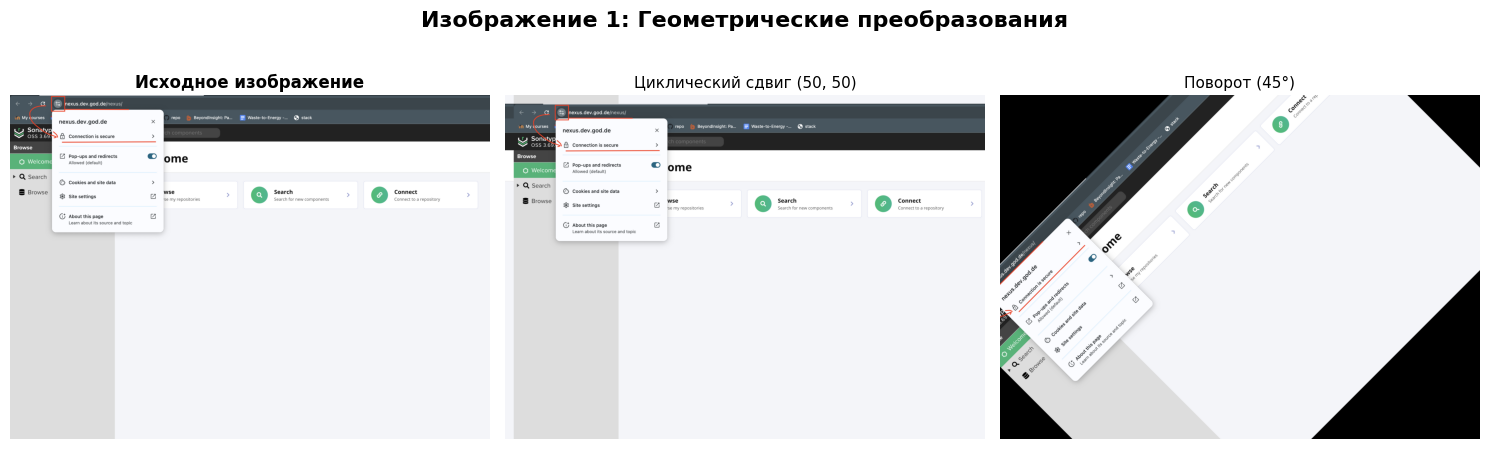

In [5]:
if len(test_images) >= 1:
    img = test_images[0]
    gray = convert_to_gray_standard(img)
    
    # c. Геометрические преобразования
    results_geometric = {
        'Циклический сдвиг (50, 50)': cyclic_shift(img, 50, 50),
        'Поворот (45°)': rotate_image(img, 45)
    }
    
    display_results(img, results_geometric, 'Изображение 1: Геометрические преобразования')


### Изображение 2


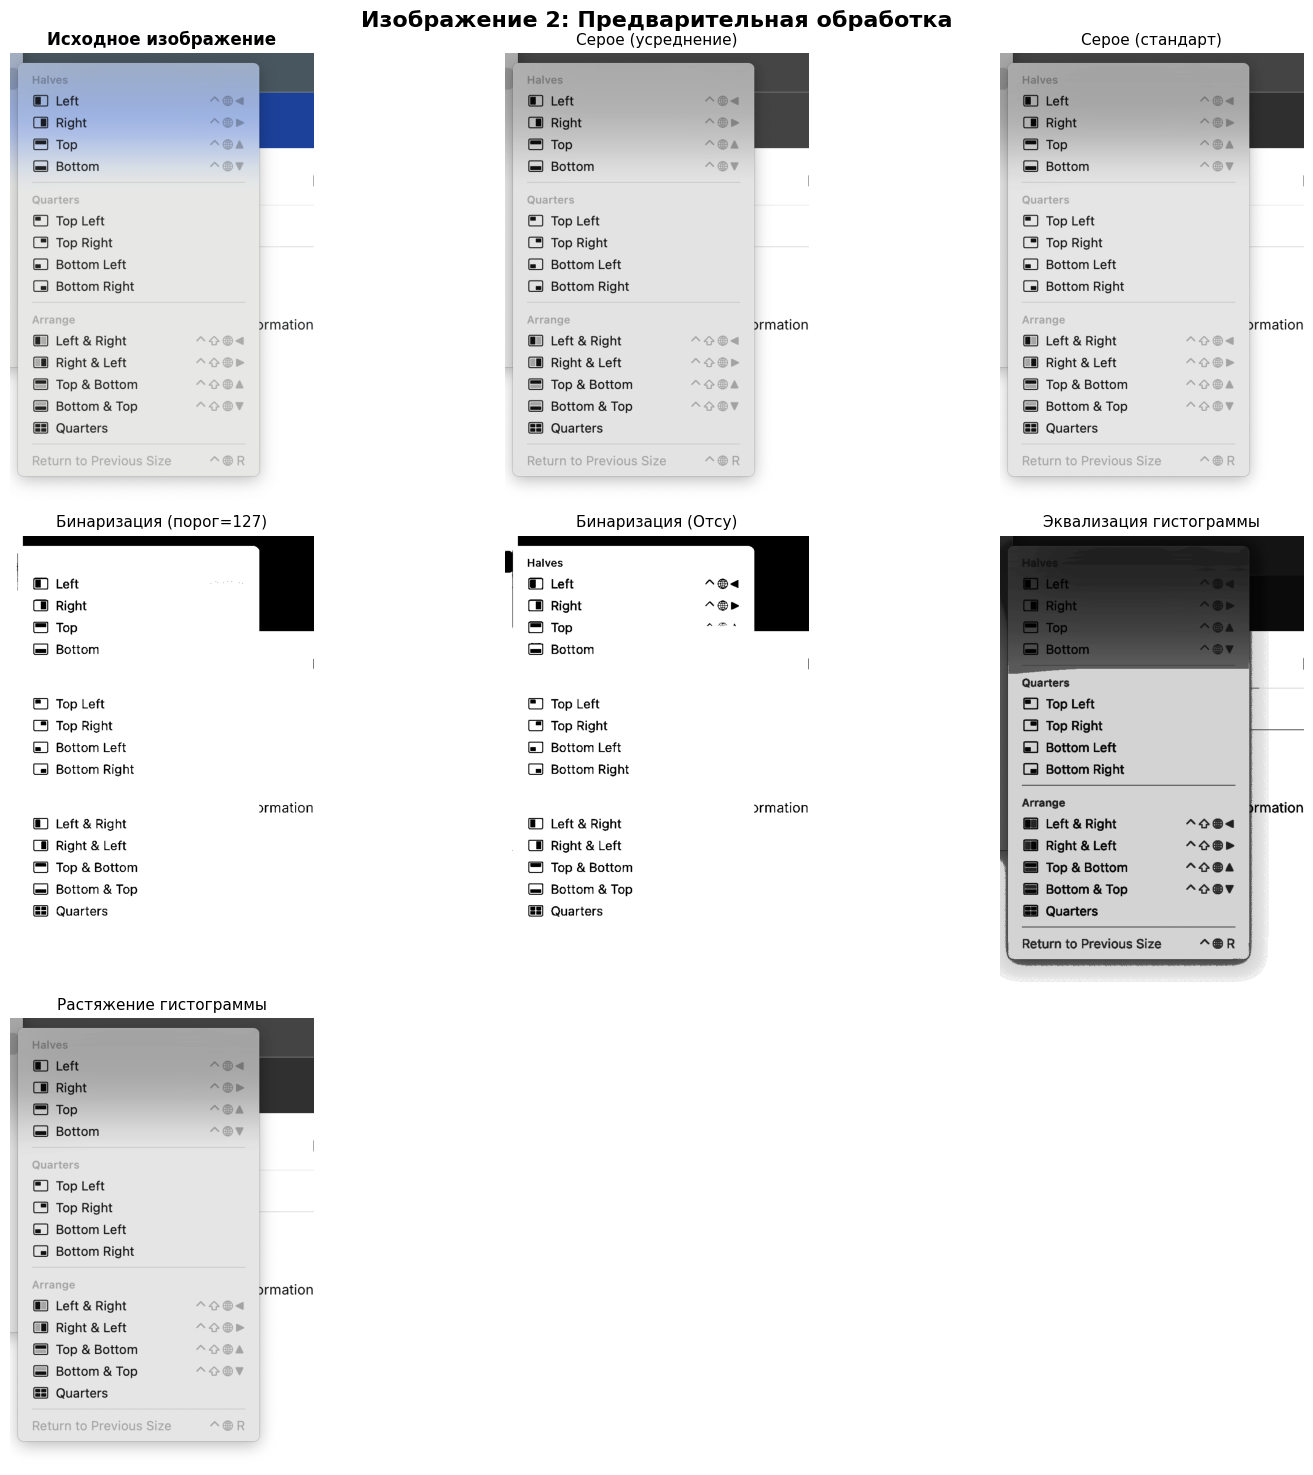

In [6]:
if len(test_images) >= 2:
    img = test_images[1]
    gray = convert_to_gray_standard(img)
    
    # a. Предварительная обработка
    results_preprocessing = {
        'Серое (усреднение)': convert_to_gray_avg(img),
        'Серое (стандарт)': gray,
        'Бинаризация (порог=127)': binarize_threshold(gray),
        'Бинаризация (Отсу)': binarize_otsu(gray),
        'Эквализация гистограммы': equalize_histogram(gray),
        'Растяжение гистограммы': stretch_histogram(gray)
    }
    
    display_results(img, results_preprocessing, 'Изображение 2: Предварительная обработка')


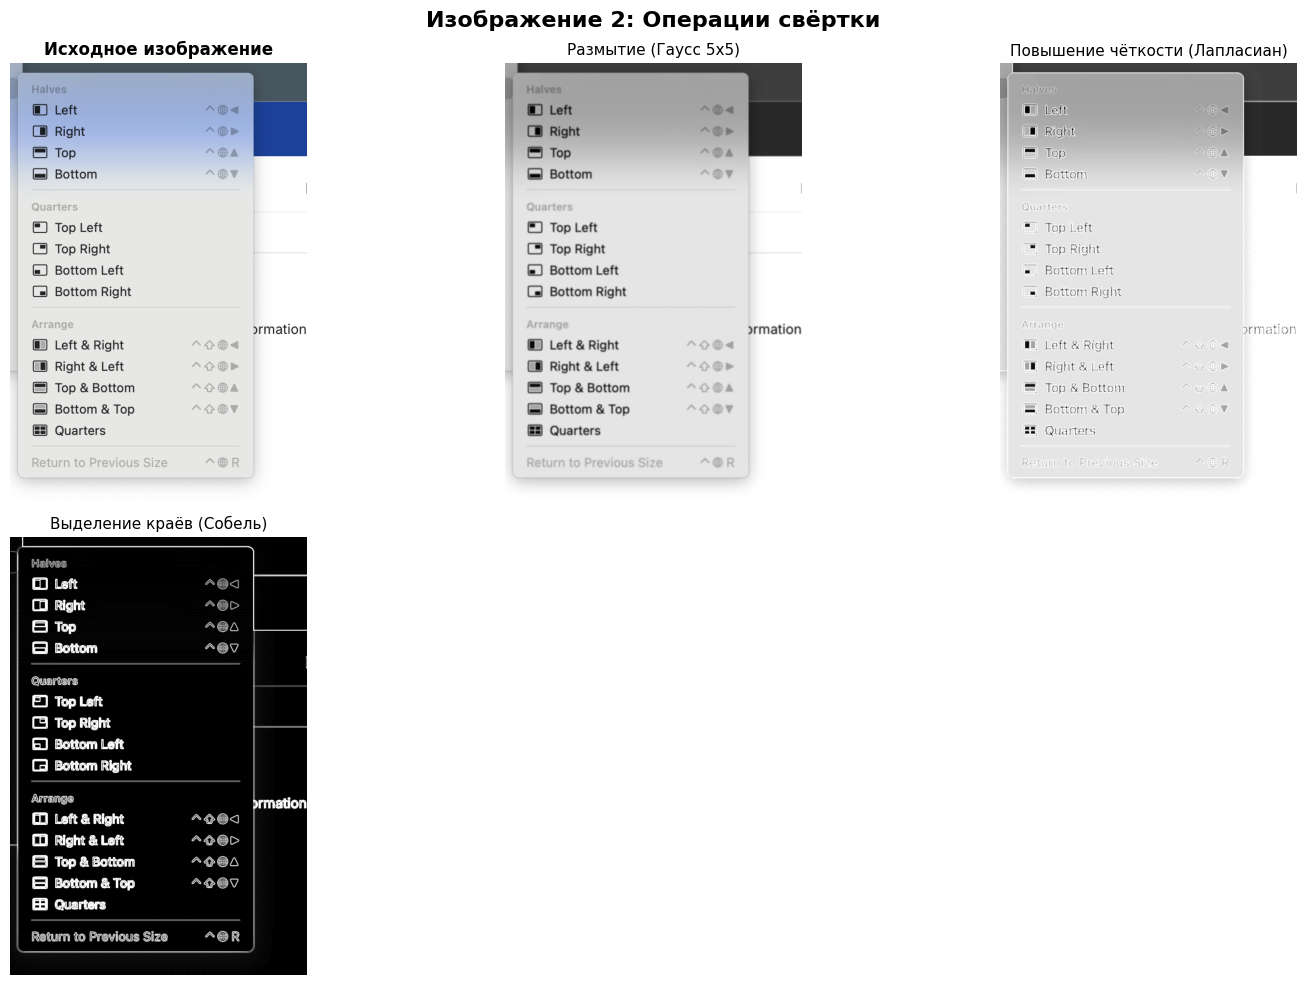

In [7]:
if len(test_images) >= 2:
    img = test_images[1]
    gray = convert_to_gray_standard(img)
    
    # b. Операции свёртки
    results_convolution = {
        'Размытие (Гаусс 5x5)': gaussian_blur(gray),
        'Повышение чёткости (Лапласиан)': sharpen_laplacian(gray),
        'Выделение краёв (Собель)': sobel_edges(gray)
    }
    
    display_results(img, results_convolution, 'Изображение 2: Операции свёртки')


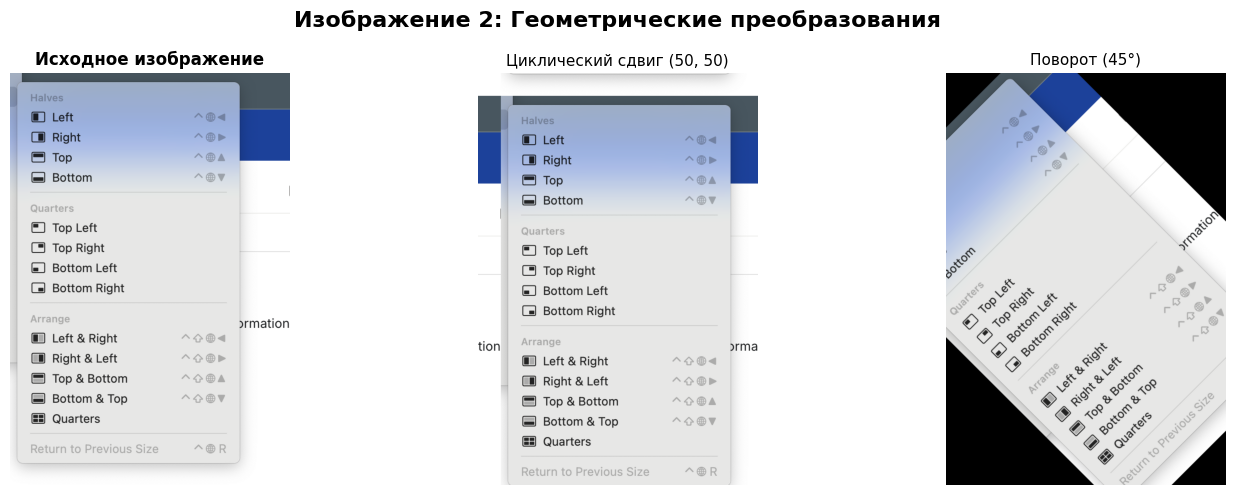

In [8]:
if len(test_images) >= 2:
    img = test_images[1]
    gray = convert_to_gray_standard(img)
    
    # c. Геометрические преобразования
    results_geometric = {
        'Циклический сдвиг (50, 50)': cyclic_shift(img, 50, 50),
        'Поворот (45°)': rotate_image(img, 45)
    }
    
    display_results(img, results_geometric, 'Изображение 2: Геометрические преобразования')


### Изображение 3


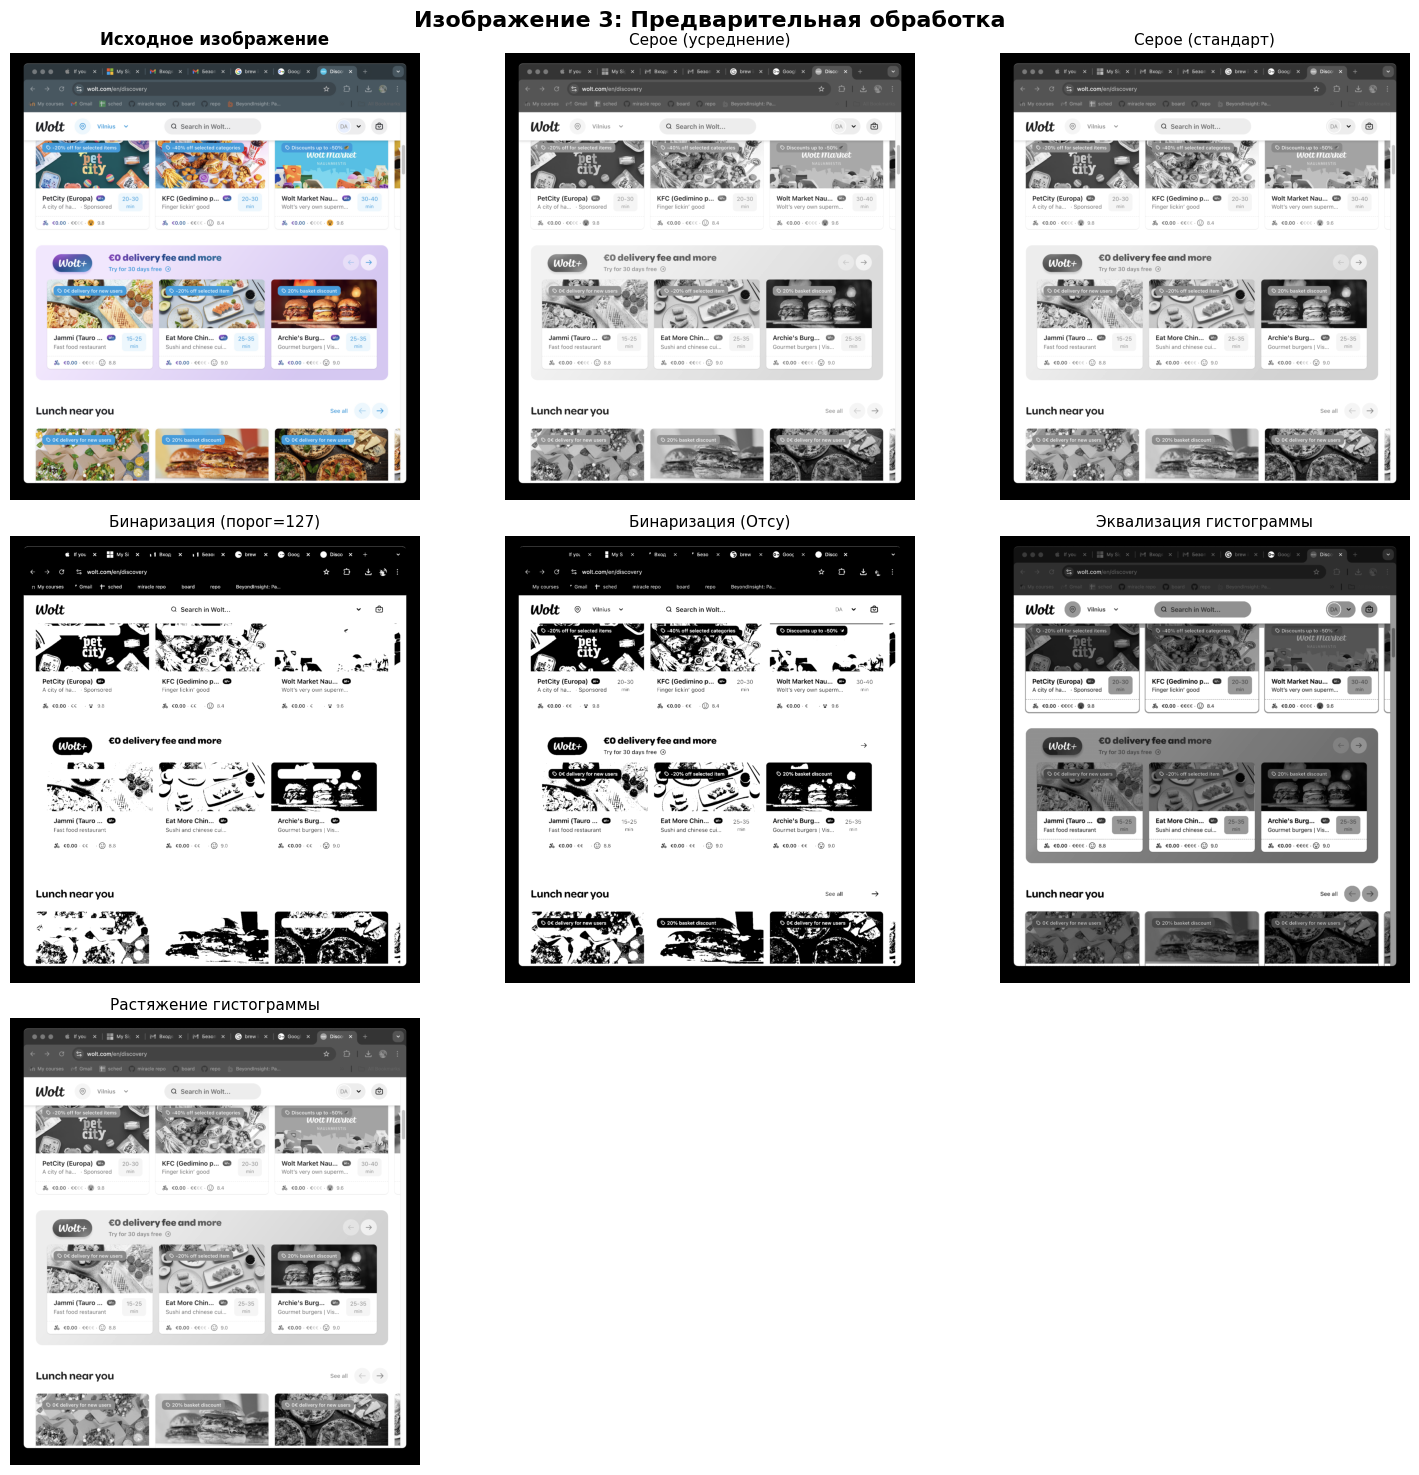

In [9]:
if len(test_images) >= 3:
    img = test_images[2]
    gray = convert_to_gray_standard(img)
    
    # a. Предварительная обработка
    results_preprocessing = {
        'Серое (усреднение)': convert_to_gray_avg(img),
        'Серое (стандарт)': gray,
        'Бинаризация (порог=127)': binarize_threshold(gray),
        'Бинаризация (Отсу)': binarize_otsu(gray),
        'Эквализация гистограммы': equalize_histogram(gray),
        'Растяжение гистограммы': stretch_histogram(gray)
    }
    
    display_results(img, results_preprocessing, 'Изображение 3: Предварительная обработка')


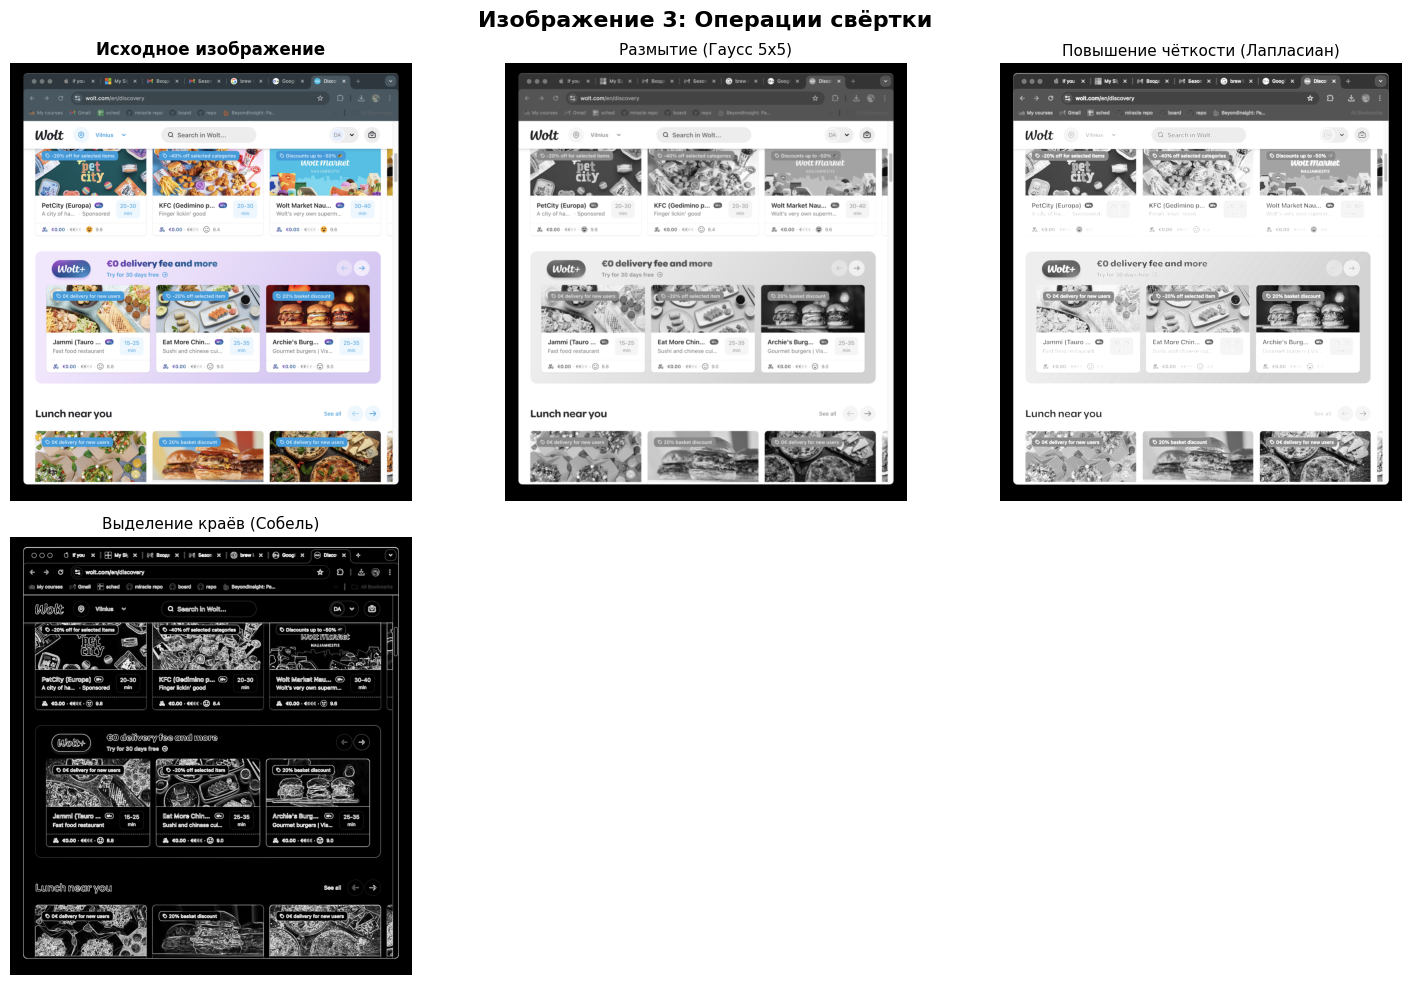

In [10]:
if len(test_images) >= 3:
    img = test_images[2]
    gray = convert_to_gray_standard(img)
    
    # b. Операции свёртки
    results_convolution = {
        'Размытие (Гаусс 5x5)': gaussian_blur(gray),
        'Повышение чёткости (Лапласиан)': sharpen_laplacian(gray),
        'Выделение краёв (Собель)': sobel_edges(gray)
    }
    
    display_results(img, results_convolution, 'Изображение 3: Операции свёртки')


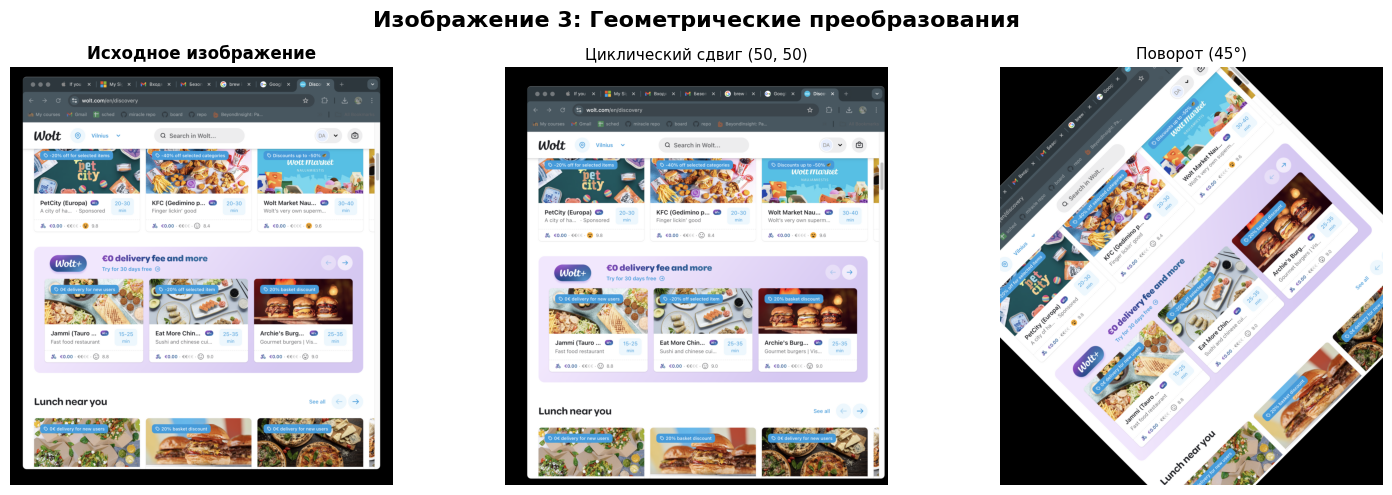

In [11]:
if len(test_images) >= 3:
    img = test_images[2]
    gray = convert_to_gray_standard(img)
    
    # c. Геометрические преобразования
    results_geometric = {
        'Циклический сдвиг (50, 50)': cyclic_shift(img, 50, 50),
        'Поворот (45°)': rotate_image(img, 45)
    }
    
    display_results(img, results_geometric, 'Изображение 3: Геометрические преобразования')


## Выводы

### Предварительная обработка

1. **Преобразование в оттенки серого**:
   - Метод усреднения даёт более яркие результаты, так как каждому каналу присваивается одинаковый вес
   - Стандартный метод OpenCV учитывает восприятие человеческим глазом (зелёный канал имеет больший вес)

2. **Бинаризация**:
   - Фиксированный порог (127) подходит для изображений с равномерным освещением
   - Метод Отсу автоматически подбирает оптимальный порог, основываясь на гистограмме, что даёт лучшие результаты для изображений с разным контрастом

3. **Работа с гистограммой**:
   - Эквализация гистограммы повышает глобальный контраст, особенно эффективна для недо- или переэкспонированных изображений
   - Растяжение гистограммы линейно масштабирует значения, сохраняя относительные различия

### Операции свёртки

1. **Размытие по Гауссу**: эффективно для подавления шума и сглаживания мелких деталей, используется как предобработка перед другими операциями

2. **Повышение чёткости (Лапласиан)**: усиливает края и мелкие детали, полезно для улучшения визуального восприятия

3. **Выделение краёв (Собель)**: хорошо выделяет границы объектов, комбинирует градиенты по горизонтали и вертикали

### Геометрические преобразования

1. **Циклический сдвиг**: перемещает содержимое изображения, пиксели с одного края появляются с другого, полезен для анализа периодических структур

2. **Поворот**: аффинное преобразование, сохраняющее параллельность линий, используется для коррекции ориентации изображения

### Общие наблюдения

- Все реализованные функции работают корректно на различных типах изображений
- Выбор конкретного метода обработки зависит от характеристик изображения и поставленной задачи
- Использование OpenCV и NumPy обеспечивает высокую производительность обработки
- Разработанное приложение с графическим интерфейсом позволяет удобно применять различные методы обработки в режиме реального времени


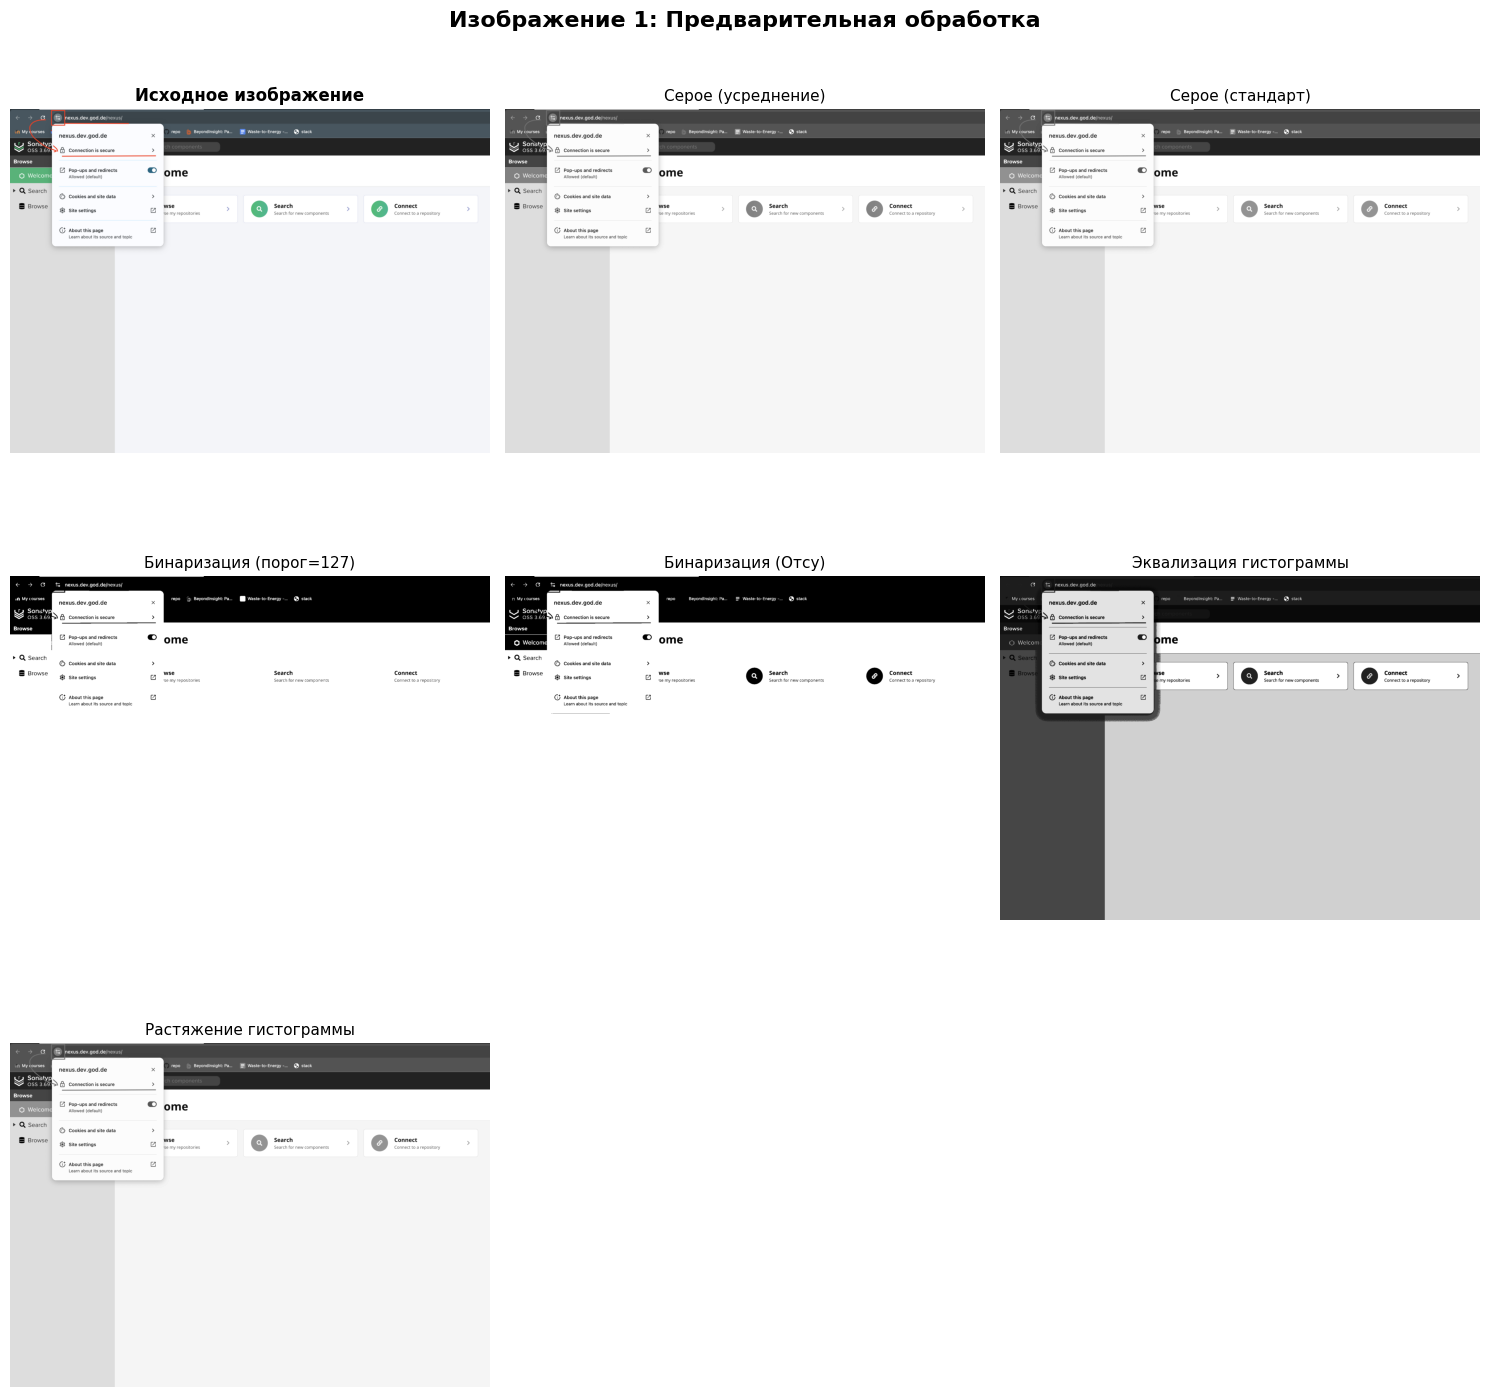

In [12]:
if len(test_images) >= 1:
    img = test_images[0]
    gray = convert_to_gray_standard(img)
    
    # a. Предварительная обработка
    results_preprocessing = {
        'Серое (усреднение)': convert_to_gray_avg(img),
        'Серое (стандарт)': gray,
        'Бинаризация (порог=127)': binarize_threshold(gray),
        'Бинаризация (Отсу)': binarize_otsu(gray),
        'Эквализация гистограммы': equalize_histogram(gray),
        'Растяжение гистограммы': stretch_histogram(gray)
    }
    
    display_results(img, results_preprocessing, 'Изображение 1: Предварительная обработка')


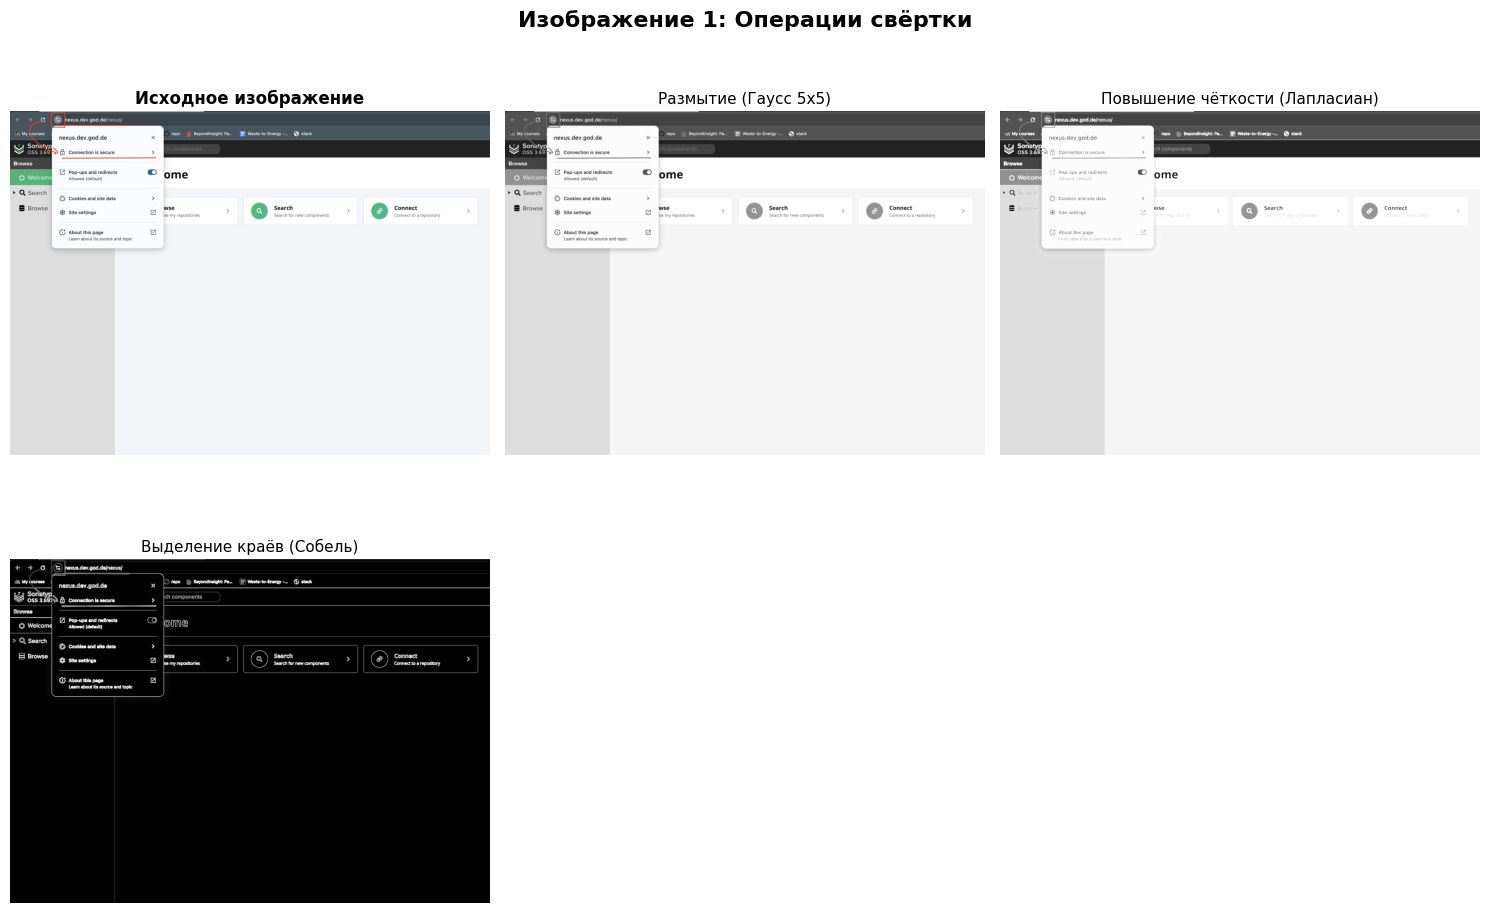

In [13]:
if len(test_images) >= 1:
    img = test_images[0]
    gray = convert_to_gray_standard(img)
    
    # b. Операции свёртки
    results_convolution = {
        'Размытие (Гаусс 5x5)': gaussian_blur(gray),
        'Повышение чёткости (Лапласиан)': sharpen_laplacian(gray),
        'Выделение краёв (Собель)': sobel_edges(gray)
    }
    
    display_results(img, results_convolution, 'Изображение 1: Операции свёртки')
